<font size="+5">#08. Cluster Analysis con k-Means</font>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
pontiac ventura sj,18.5,6,250.0,110.0,3645,16.2,76,usa
amc matador (sw),14.0,8,304.0,150.0,4257,15.5,74,usa
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,europe
pontiac grand prix lj,16.0,8,400.0,180.0,4220,11.1,77,usa
ford country squire (sw),15.5,8,351.0,142.0,4054,14.3,79,usa
oldsmobile cutlass ciera (diesel),38.0,6,262.0,85.0,3015,17.0,82,usa
pontiac phoenix lj,19.2,6,231.0,105.0,3535,19.2,78,usa
fiat 131,28.0,4,107.0,86.0,2464,15.5,76,europe
dodge aspen 6,20.6,6,225.0,110.0,3360,16.6,79,usa


# Seleccionar 2 Variables para el Análisis de Clúster

> En este caso **ambas variables son explicativas**. La variable que queremos predecir no se la damos al modelo. Sino que tratará de adivinarla en base a cómo de cerca estén los puntos.

In [5]:
explanatory = df[['horsepower','weight']].dropna()

In [4]:
explanatory.head()

,horsepower,weight
name,,
chevrolet chevelle malibu,130.0,3504
buick skylark 320,165.0,3693
plymouth satellite,150.0,3436
amc rebel sst,150.0,3433
ford torino,140.0,3449


# Scatterplot con las Variables

> Deberíamos observar en la gráfica cuántos posibles grupos podríamos hacer para agrupar los puntos.

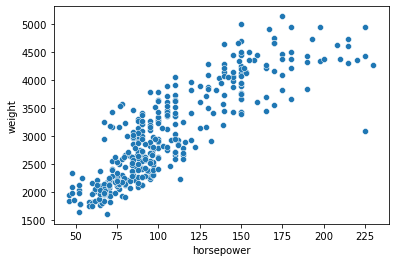

In [8]:
sns.scatterplot(data = df ,x = 'horsepower', y = 'weight');

# Transformación de los Datos

> Deberíamos valorar si tenemos que realizar algunos cambios a los datos para que el modelo de k-Means se compute adecuadamente y pueda comparar ambas variables.
>
> Las variables originales pueden tener un rango de valores diferente.
>
> Imaginemos que tenemos dos variables:
>
> - Peso (en kilogramos)
> - Altura (en metros)
>
> **Es lo mismo** incrementar 1 kilogramo de peso, que incrementar 1 metro de altura?
> 
> - Hazte las mismas preguntas con tus variables.

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
transform_scaler = scaler.fit_transform(X=explanatory)
transform_scaler

array([[0.45652174, 0.5361497 ],
       [0.64673913, 0.58973632],
       [0.56521739, 0.51686986],
       [0.56521739, 0.51601928],
       [0.51086957, 0.52055571],
       [0.82608696, 0.77346187],
       [0.94565217, 0.77714772],
       [0.91847826, 0.76523958],
       [0.97282609, 0.79727814],
       [0.7826087 , 0.63425007],
       [0.67391304, 0.5528778 ],
       [0.61956522, 0.56592005],
       [0.56521739, 0.60901616],
       [0.97282609, 0.41763538],
       [0.26630435, 0.21519705],
       [0.26630435, 0.34590303],
       [0.27717391, 0.32917494],
       [0.21195652, 0.27615537],
       [0.22826087, 0.1465835 ],
       [0.        , 0.06294301],
       [0.22282609, 0.30025517],
       [0.23913043, 0.23164162],
       [0.26630435, 0.21604763],
       [0.36413043, 0.17607031],
       [0.23913043, 0.29345052],
       [0.91847826, 0.85114828],
       [0.83695652, 0.78338531],
       [0.89130435, 0.78508648],
       [0.79891304, 0.88432095],
       [0.22826087, 0.1465835 ],
       [0.

In [43]:
df_scaled = pd.DataFrame(transform_scaler, columns=explanatory.columns)
df_scaled

,horsepower,weight
0,0.456522,0.536150
1,0.646739,0.589736
2,0.565217,0.516870
3,0.565217,0.516019
4,0.510870,0.520556
...,...,...
387,0.217391,0.333711
388,0.032609,0.146583
389,0.206522,0.193365
390,0.179348,0.286929


# Entrenar Modelo `KMeans()`

> Podremos predecir 1, 2, 3,..., k grupos. Tantos como queramos. Sin embargo, seleccionaremos `n_cluster = 3` para no complicarnos la vida.
> 1. **Necesidad:** Entrenar Modelo
> 2. **Solución: Función** `fit()`

In [44]:
from sklearn.cluster import KMeans

In [45]:
model = KMeans(n_clusters=3, verbose=1)

In [46]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 1}

In [48]:
model.fit(X=df_scaled)

Initialization complete
Iteration 0, inertia 10.494104101008727
Iteration 1, inertia 9.20844026231255
Iteration 2, inertia 8.937887617119415
Iteration 3, inertia 8.687513705477915
Iteration 4, inertia 8.377608729088273
Iteration 5, inertia 8.063745758394
Iteration 6, inertia 7.754997030131964
Iteration 7, inertia 7.273333251533774
Iteration 8, inertia 6.954476725424632
Iteration 9, inertia 6.881698753867822
Iteration 10, inertia 6.828914854929642
Iteration 11, inertia 6.788877614158945
Iteration 12, inertia 6.773819080193906
Iteration 13, inertia 6.772084301612207
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 9.780770323937185
Iteration 1, inertia 6.955993012593188
Iteration 2, inertia 6.78876588773031
Iteration 3, inertia 6.773290744908309
Iteration 4, inertia 6.772084301612207
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 11.333641505171897
Iteration 1, inertia 8.56386780875444
Iteration 2, ine

KMeans(n_clusters=3, verbose=1)

# Realizar Predicciones

> - `model.predict()`

Creo un modelo para introducir el número de cluster cómo una nueva columna

In [49]:
dfsel = df_scaled.copy()

In [50]:
dfsel['Cluster'] = model.predict(X=dfsel)

In [51]:
dfsel

,horsepower,weight,Cluster
0,0.456522,0.536150,0
1,0.646739,0.589736,1
2,0.565217,0.516870,1
3,0.565217,0.516019,1
4,0.510870,0.520556,1
...,...,...,...
387,0.217391,0.333711,0
388,0.032609,0.146583,2
389,0.206522,0.193365,2
390,0.179348,0.286929,2


# Visualizar Modelo

> - Scatterplot con puntos coloreados según el grupo al que pertenece cada observación: `hue = model.labels_`
> - Añade otra capa de puntos, los cuales indicarán los centroides (se encuentran en `model.cluster_centers_`)

In [52]:
import matplotlib.pyplot as px

In [53]:
px

<module 'matplotlib.pyplot' from '/Users/sota/miniforge3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [54]:
import plotly.express as px

In [55]:
a = 'hola'

In [56]:
dfsel

,horsepower,weight,Cluster
0,0.456522,0.536150,0
1,0.646739,0.589736,1
2,0.565217,0.516870,1
3,0.565217,0.516019,1
4,0.510870,0.520556,1
...,...,...,...
387,0.217391,0.333711,0
388,0.032609,0.146583,2
389,0.206522,0.193365,2
390,0.179348,0.286929,2


In [62]:
dfcentroides = dfsel.groupby('Cluster').mean()

In [63]:
dfcentroides

,horsepower,weight
Cluster,,
0,0.290865,0.425741
1,0.632265,0.724492
2,0.159017,0.163040


In [67]:
dfcentroides.index

Int64Index([0, 1, 2], dtype='int64', name='Cluster')

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

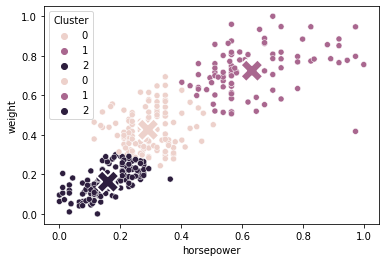

In [70]:
sns.scatterplot(data=dfsel, x='horsepower', y='weight', hue="Cluster")
sns.scatterplot(data=dfcentroides, x='horsepower', y='weight', hue=dfcentroides.index, s=500, marker='X')

In [71]:
model.predict([[0.8,0.9]])

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([1], dtype=int32)

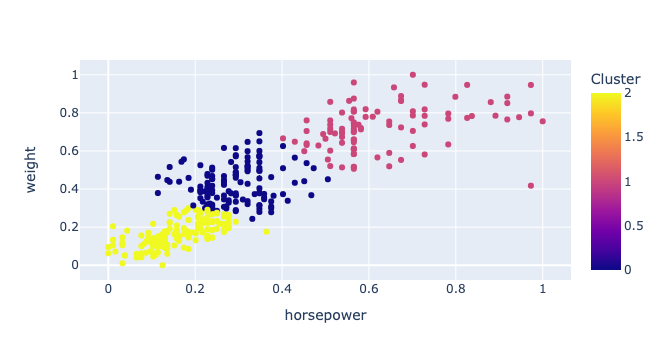

In [57]:
px.scatter(data_frame=dfsel, x='horsepower', y='weight', color="Cluster")

In [58]:
sns.scatterplot(x='cylinders', y='weight', hue= 'Cluster', data=df1, palette='Set2')

ValueError: Could not interpret value `Cluster` for parameter `hue`

# Interpretar Modelo

> 1. Si tuvieras que ponerle nombre a cada grupo, ¿cuál le darías?
> 2. ¿En qué te basas para ello?

In [ ]:
pd.read_sql(sql = 'select * from ', con = )

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender **cómo la máquina optimiza un modelo**, que no es más que encontrar **los números** una ecuación matemática.
- [X] La importancia de la **Suma de Cuadrados** como concepto fundamental de la estadística para medir el **error**.
    - Regresion Lineal
    - Support Vector Machines
    - Neural Networks
- [X] Entender la necesidad de **Normalizar** los datos al emplear un algoritmo que involucra el **cálculo de distancias**.
- [X] Entender que la estadística no es más que una forma de aproximarse a la realidad. Y esta aproximación no es una ciencia exacta, sino **subjetiva**.
- [X] Empezar a distinguir, más aún, que la programación es una herramienta hacia un fin.
- [X] Al principio, nos salen muchos errores programando y creemos que no valemos para esto. Sin embargo, en este momento del programa, veremos que existen unos **patrones que siempre se cumplen en los errores** y empezaremos a **entender la máquina**.
- [X] Una vez más, nos daremos cuenta de que existen **distintos modelos para realizar el Análisis de Cluster**. De la misma manera que en el anterior capítulo también existían diversos Modelos de Regresión.